# Day 3: Numerical Solution of ODEs

This notebook introduces two fundamental numerical methods for solving **ordinary differential equations (ODEs) with initial conditions**:

* Euler's Method
* Fourth-Order Runge–Kutta Method (RK4)

The material is aimed at **undergraduate students**, with clear explanations, worked examples, Python implementations, and comparisons with exact solutions.

---

## 1. Initial Value Problems (IVPs)

An **initial value problem** has the form:
$$
\begin{cases}
y'(t) = f(t, y(t)), \ \
y(t_0) = y_0
\end{cases}
$$

* The function $f(t,y)$ gives the slope of the solution
* The initial condition selects a unique solution
* In many cases, the exact solution cannot be found analytically

Numerical methods approximate the solution at discrete points.

---

## 2. Euler's Method

### 2.1 Idea

Euler's method replaces the solution curve by **small straight line segments**.

From the definition of the derivative:
$$
y(t_{n+1}) \approx y(t_n) + y'(t_n)(t_{n+1}-t_n)
$$

Using $y'(t_n)=f(t_n,y_n)$ and a step size $h$:

$$\boxed{y_{n+1} = y_n + h f(t_n, y_n)}$$

---

### 2.2 Python Implementation


In [2]:

import numpy as np

def euler_method(f, t0, y0, h, n_steps):
    t = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    t[0], y[0] = t0, y0

    for n in range(n_steps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h
    
    return t, y


---

## 3. Fourth-Order Runge–Kutta Method (RK4)

### 3.1 Motivation

Euler's method is simple but can be inaccurate. RK4 improves accuracy by sampling the slope at **four points per step** and taking a weighted average.

---

### 3.2 RK4 Formulation

```math
k_1 = f(t_n, y_n)
k_2 = f(t_n + h/2, y_n + h/2*k_1)
k_3 = f(t_n + h/2, y_n + h/2*k_2)
k_4 = f(t_n + h, y_n + h*k_3)
y_{n+1} = y_n + (h/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
```

* This method has **global error $O(h^4)$**, much more accurate than Euler or RK2.

---

### 3.3 Python Implementation

In [3]:
def rk4_method(f, t0, y0, h, n_steps):
    t = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    t[0], y[0] = t0, y0

    for n in range(n_steps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2*k1)
        k3 = f(t[n] + h/2, y[n] + h/2*k2)
        k4 = f(t[n] + h, y[n] + h*k3)
        y[n+1] = y[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t[n+1] = t[n] + h
    
    return t, y

---

## 4. Example: Exponential Growth

Consider the IVP:

$$
y' = y, \quad y(0)=1$$

Exact solution:

$$y(t) = e^t$$

---

### 4.1 Numerical Approximation

In [5]:
import matplotlib.pyplot as plt

f = lambda t, y: y
exact = lambda t: np.exp(t)

h = 0.2
n_steps = 20

te, ye = euler_method(f, 0, 1, h, n_steps)
tr, yr = rk4_method(f, 0, 1, h, n_steps)

texact = np.linspace(0, te[-1], 200)

---

### 4.2 Comparison Plot

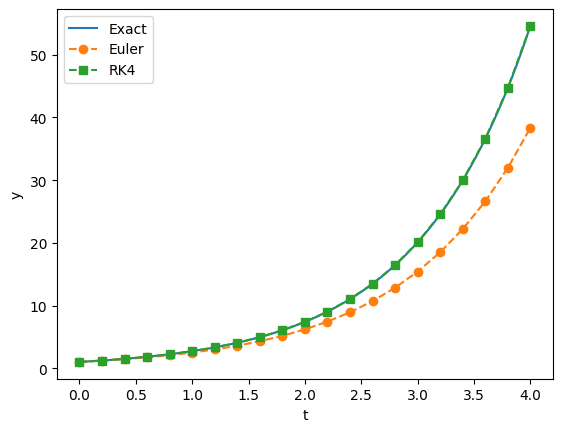

In [6]:
plt.figure()
plt.plot(texact, exact(texact), label="Exact")
plt.plot(te, ye, 'o--', label="Euler")
plt.plot(tr, yr, 's--', label="RK4")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


---

## 5. Accuracy Discussion

* Euler: global error $O(h)$
* RK4: global error $O(h^4)$
* RK4 is far more accurate than Euler for the same step size

---

## 6. Exercises

### Exercise 1

Solve $y' = 2t$, $y(0)=1$ using Euler and RK4 with $h=0.25$. Compare with the exact solution.

### Exercise 2

Solve $y' = -2y + 1$, $y(0)=0$ using both Euler and RK4, plot solutions and compare.

### Exercise 3

Investigate step sizes $h=0.5$, $0.2$, $0.05$ for $y'=y$, $y(0)=1$ using Euler and RK4.

### Exercise 4

Compare computational cost vs accuracy between Euler and RK4 for $y' = \sin(t) - y$, $y(0)=0$ over $[0,10]$.

---